In [123]:
!git clone https://github.com/cocodataset/cocoapi

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [124]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import os
os.chdir('/content/cocoapi/PythonAPI')
os.getcwd()

'/content/cocoapi/PythonAPI'

In [126]:
!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-ind

In [127]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
import PIL
import requests
from PIL import Image
import glob

In [128]:
dataDir='/content/drive/My Drive/Deep_Learning/Homeworks/HW5'
dataType='val2014'
annFile='{}/instances_{}.json'.format(dataDir,dataType)

In [129]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=9.91s)
creating index...
index created!


In [145]:
os.chdir('/content/drive/My Drive/Deep_Learning/Homeworks/HW6')
classes_to_scrape = ['bus', 'truck', 'car']
if not os.path.exists('Val'):
		os.mkdir('Val')
root = os.path.join('/content/drive/My Drive/Deep_Learning/Homeworks/HW6', 'Val')
images_per_class = 12

In [146]:
##downloader with bbox for images containing bus, car, and truck 
catIds = coco.getCatIds(catNms=classes_to_scrape);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

counter = 0

os.chdir(root)	
for im in imgs:
  counter += 1

  annIds=coco.getAnnIds(imgIds=im['id'],catIds=catIds,iscrowd=False)
  ann=coco.loadAnns(annIds)
    
  if len(ann) <= 5:
    
    if counter > images_per_class:
      break

    filenames_before_download = os.listdir()
		
    img_data = requests.get(im['coco_url']).content
    with open(im['file_name'], 'wb') as downloader:			
      downloader.write(img_data)
      
    name = im['file_name'][0:-4]
      
    img_file_path = os.path.join(root, im['file_name'])
	
    im = Image . open ( img_file_path )
      
    if im.mode != "RGB":
      im = im.convert ( mode = "RGB" )

    I = io. imread ( img_file_path)
    image = np. uint8 (I)
    final_size = 128
    y_ratio = image.shape[0]/final_size
    x_ratio = image.shape[1]/final_size
    im_resized = im . resize (( final_size , final_size ) , Image . BOX )
		# Overwrite original image with downsampled image
    im_resized . save ( img_file_path )	
    
    ##check if an image is already downloaded
    filenames_after_download = os.listdir()

    I = io. imread ( img_file_path)

    ##Create a dictionary for the required annotation
    import json
    dict = {'num_objects' : len(ann), 'bboxes' : {0: None, 1: None, 2: None, 3: None, 4:None} , 'labels' : {0: None, 1: None, 2: None, 3: None, 4:None}}

    for i in range(len(ann)):
    ##add and save the bbox with the same name as the image
      [x,y,w,h] = (ann[i]['bbox'])
      x = x / x_ratio
      w = w / x_ratio
      y = y / y_ratio
      h = h / y_ratio
      
      dict['bboxes'][i] =  [x,y,w,h]
      dict['labels'][i] =  ann[i]['category_id']

    ##Save the entire dictionary of annotation as a json file
    filename = name + '.json'
    json = json.dumps(dict)
    f = open(filename,"w")
    f.write(json)
    f.close()

    if len(filenames_before_download) == len(filenames_after_download):
      counter -= 1

  else:
    counter -= 1

In [147]:
##downloader with bbox for images containing bus and car
classes_to_scrape = ['bus', 'car']
catIds = coco.getCatIds(catNms=classes_to_scrape);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

counter = 0

os.chdir(root)	
for im in imgs:
  counter += 1

  annIds=coco.getAnnIds(imgIds=im['id'],catIds=catIds,iscrowd=False)
  ann=coco.loadAnns(annIds)
    
  if len(ann) <= 5:
    
    if counter > images_per_class:
      break

    filenames_before_download = os.listdir()
		
    img_data = requests.get(im['coco_url']).content
    with open(im['file_name'], 'wb') as downloader:			
      downloader.write(img_data)
      
    name = im['file_name'][0:-4]
      
    img_file_path = os.path.join(root, im['file_name'])
	
    im = Image . open ( img_file_path )
      
    if im.mode != "RGB":
      im = im.convert ( mode = "RGB" )

    I = io. imread ( img_file_path)
    image = np. uint8 (I)
    final_size = 128
    y_ratio = image.shape[0]/final_size
    x_ratio = image.shape[1]/final_size
    im_resized = im . resize (( final_size , final_size ) , Image . BOX )
		# Overwrite original image with downsampled image
    im_resized . save ( img_file_path )	
    
    ##check if an image is already downloaded
    filenames_after_download = os.listdir()

    I = io. imread ( img_file_path)

    ##Create a dictionary for the required annotation
    import json
    dict = {'num_objects' : len(ann), 'bboxes' : {0: None, 1: None, 2: None, 3: None, 4:None} , 'labels' : {0: None, 1: None, 2: None, 3: None, 4:None}}

    for i in range(len(ann)):
    ##add and save the bbox with the same name as the image
      [x,y,w,h] = (ann[i]['bbox'])
      x = x / x_ratio
      w = w / x_ratio
      y = y / y_ratio
      h = h / y_ratio
      
      dict['bboxes'][i] =  [x,y,w,h]
      dict['labels'][i] =  ann[i]['category_id']

    ##Save the entire dictionary of annotation as a json file
    filename = name + '.json'
    json = json.dumps(dict)
    f = open(filename,"w")
    f.write(json)
    f.close()

    if len(filenames_before_download) == len(filenames_after_download):
      counter -= 1

  else:
    counter -= 1

In [148]:
##downloader with bbox for images containing bus and truck 
classes_to_scrape = ['bus', 'truck']
catIds = coco.getCatIds(catNms=classes_to_scrape);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

counter = 0

os.chdir(root)	
for im in imgs:
  counter += 1

  annIds=coco.getAnnIds(imgIds=im['id'],catIds=catIds,iscrowd=False)
  ann=coco.loadAnns(annIds)
    
  if len(ann) <= 5:
    
    if counter > images_per_class:
      break

    filenames_before_download = os.listdir()
		
    img_data = requests.get(im['coco_url']).content
    with open(im['file_name'], 'wb') as downloader:			
      downloader.write(img_data)
      
    name = im['file_name'][0:-4]
      
    img_file_path = os.path.join(root, im['file_name'])
	
    im = Image . open ( img_file_path )
      
    if im.mode != "RGB":
      im = im.convert ( mode = "RGB" )

    I = io. imread ( img_file_path)
    image = np. uint8 (I)
    final_size = 128
    y_ratio = image.shape[0]/final_size
    x_ratio = image.shape[1]/final_size
    im_resized = im . resize (( final_size , final_size ) , Image . BOX )
		# Overwrite original image with downsampled image
    im_resized . save ( img_file_path )	
    
    ##check if an image is already downloaded
    filenames_after_download = os.listdir()

    I = io. imread ( img_file_path)

    ##Create a dictionary for the required annotation
    import json
    dict = {'num_objects' : len(ann), 'bboxes' : {0: None, 1: None, 2: None, 3: None, 4:None} , 'labels' : {0: None, 1: None, 2: None, 3: None, 4:None}}

    for i in range(len(ann)):
    ##add and save the bbox with the same name as the image
      [x,y,w,h] = (ann[i]['bbox'])
      x = x / x_ratio
      w = w / x_ratio
      y = y / y_ratio
      h = h / y_ratio
      
      dict['bboxes'][i] =  [x,y,w,h]
      dict['labels'][i] =  ann[i]['category_id']

    ##Save the entire dictionary of annotation as a json file
    filename = name + '.json'
    json = json.dumps(dict)
    f = open(filename,"w")
    f.write(json)
    f.close()

    if len(filenames_before_download) == len(filenames_after_download):
      counter -= 1

  else:
    counter -= 1

In [149]:
##downloader with bbox for images containing car and truck 
classes_to_scrape = ['truck', 'car']
catIds = coco.getCatIds(catNms=classes_to_scrape);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

counter = 0

os.chdir(root)	
for im in imgs:
  counter += 1

  annIds=coco.getAnnIds(imgIds=im['id'],catIds=catIds,iscrowd=False)
  ann=coco.loadAnns(annIds)
    
  if len(ann) <= 5:
    
    if counter > images_per_class:
      break

    filenames_before_download = os.listdir()
		
    img_data = requests.get(im['coco_url']).content
    with open(im['file_name'], 'wb') as downloader:			
      downloader.write(img_data)
      
    name = im['file_name'][0:-4]
      
    img_file_path = os.path.join(root, im['file_name'])
	
    im = Image . open ( img_file_path )
      
    if im.mode != "RGB":
      im = im.convert ( mode = "RGB" )

    I = io. imread ( img_file_path)
    image = np. uint8 (I)
    final_size = 128
    y_ratio = image.shape[0]/final_size
    x_ratio = image.shape[1]/final_size
    im_resized = im . resize (( final_size , final_size ) , Image . BOX )
		# Overwrite original image with downsampled image
    im_resized . save ( img_file_path )	
    
    ##check if an image is already downloaded
    filenames_after_download = os.listdir()

    I = io. imread ( img_file_path)

    ##Create a dictionary for the required annotation
    import json
    dict = {'num_objects' : len(ann), 'bboxes' : {0: None, 1: None, 2: None, 3: None, 4:None} , 'labels' : {0: None, 1: None, 2: None, 3: None, 4:None}}

    for i in range(len(ann)):
    ##add and save the bbox with the same name as the image
      [x,y,w,h] = (ann[i]['bbox'])
      x = x / x_ratio
      w = w / x_ratio
      y = y / y_ratio
      h = h / y_ratio
      
      dict['bboxes'][i] =  [x,y,w,h]
      dict['labels'][i] =  ann[i]['category_id']

    ##Save the entire dictionary of annotation as a json file
    filename = name + '.json'
    json = json.dumps(dict)
    f = open(filename,"w")
    f.write(json)
    f.close()

    if len(filenames_before_download) == len(filenames_after_download):
      counter -= 1

  else:
    counter -= 1

In [150]:
os.chdir(root)
bbox_files = glob.glob('*.json')
bbox_files.sort()
image_files = glob.glob('*.jpg')
image_files.sort()
print (len(image_files))
print (len(bbox_files))

48
48


In [151]:
import torch
from torch . utils . data import DataLoader , Dataset
import scipy
from scipy import misc
import os
import glob
import PIL
from PIL import Image
import numpy as np
from skimage import io, transform
import torch.nn.functional as F
import json

class your_dataset_class(torch.utils.data.Dataset):
    def __init__ (self, root_path, transform) :
      self.path = root_path
      self.transform = transform 
      self.images = []
      self.bbox = []
      self.labels = []
      self.num_objects = []
      
      os.chdir(self.path)
      bbox_files = glob.glob('*.json')
      bbox_files.sort()
      image_files = glob.glob('*.jpg')
      image_files.sort()
      for filename in image_files:	
      	self.images.append(self.transform(Image.open(filename)))

      for filename in bbox_files:	
        with open(filename) as f:
	        annotation = json.load(f)
        num_objects_in_image = annotation['num_objects']
        self.num_objects.append(num_objects_in_image)

        max_objects_in_image = 5
        image_bboxes = torch.zeros(max_objects_in_image, 4 , dtype=torch.uint8)
        image_labels = torch.zeros(max_objects_in_image, dtype=torch.uint8) + 13

        for i in range(num_objects_in_image):
          if annotation['labels'][str(i)] == 3:
            image_labels[i] = 0
          elif annotation['labels'][str(i)] == 6:
            image_labels[i] = 1
          elif annotation['labels'][str(i)] == 8:
            image_labels[i] = 2

          image_bboxes[i] = torch.LongTensor(annotation['bboxes'][str(i)])
        
        self.bbox.append(image_bboxes)
        self.labels.append(image_labels)
			
      self.len = len(self.images)

    def __getitem__(self, index):
      return self.images[index], self.labels[index], self.bbox[index], self.num_objects[index]

    def __len__(self):
      return self.len

In [152]:
from torchvision import transforms as tvt
transform = tvt . Compose ( [ tvt . ToTensor () , tvt . Normalize (( 0.5 ,0.5 ,0.5 ) , ( 0.5 , 0.5 , 0.5 ) ) ] )
val_dataset = your_dataset_class (root, transform)

val_data_loader = torch.utils.data.DataLoader(dataset =
val_dataset ,
batch_size =  val_dataset.__len__() , #7,
shuffle = True ,
num_workers = 4 )
print (val_dataset.__len__()) 

48


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Begin the Yolo desing

In [153]:
import torch
import torch.nn as nn
import random
import matplotlib.pylab as plt

seed = 0
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.becnhmarks = False
os.environ['PYTHONHASHSEED'] = str(seed)

dtype = torch . float64

device = torch . device ( "cuda:0" if torch.cuda.is_available() else "cpu" )

''' Part of this code is borrowed from https://github.com/aladdinpersson and DLStudio module '''
#classification + regression
class block(nn.Module):
  def __init__(self, in_channels, out_channels, identity_downsample, x_downsample):
    super().__init__()
    self.scale_factor = 2
    self.in_channels = in_channels
    self.conv1 = nn.Conv2d(self.in_channels, out_channels, kernel_size = 2, stride = 1, padding = 0)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 2, stride = 1, padding = 1)
    self.bn2 = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU()
    self.identity_downsample = identity_downsample
    self.x_downsample = x_downsample

  def forward(self, x):
    
    if self.identity_downsample is not None:
     x = self.identity_downsample(x)
     
    identity = x
    x = self.conv1(x)
    
    x = self.bn1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.bn2(x)

    x += identity
    x = self.relu(x)
    return x

class Net(nn.Module):
  def __init__(self, block, layers, original_channels, num_classes):
    super().__init__()
    self.in_channels = 64
    self.conv1 = nn.Conv2d(original_channels, self.in_channels, kernel_size = 3, stride = 1, padding = 1)
    self.bn1 = nn.BatchNorm2d(self.in_channels)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

    self.block1 = self.__make_layer(block, layers[0], out_channels = 64)
    self.block2 = self.__make_layer(block, layers[1], out_channels = 128) 
    self.block3 = self.__make_layer(block, layers[2], out_channels = 256)

    self.fc = nn.Linear(256 * 16 * 16, 1440)
    #self.fc_seqn = nn.Sequential(
     #               nn.Linear(256 * 16 * 16, 4096),
      #              nn.ReLU(inplace=True),
       #             nn.Linear(4096, 2048),
        #            nn.ReLU(inplace=True),
         #           nn.Linear(2048, 1440)
          #      )


  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)

    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)

    x = x.view(-1, 256 * 16 * 16)
    #x = F.relu(self.fc(x))
    #x = self.fc_seqn(x)
    x = self.fc(x)
    return x

  def __make_layer(self, block, num_blocks, out_channels):
    identity_downsample = None
    x_downsample = None
    layers = []

    if self.in_channels != out_channels:
      identity_downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels, kernel_size = 1, stride = 2) , nn.BatchNorm2d(out_channels) )
      x_downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels//2, kernel_size = 1, stride = 2) , nn.BatchNorm2d(out_channels//2) )
      
    self.in_channels = out_channels
    layers.append(block(self.in_channels, out_channels, identity_downsample, x_downsample))

    for i in range(num_blocks - 1):
      identity_downsample = None
      layers.append(block(self.in_channels, out_channels, identity_downsample, x_downsample))

    return nn.Sequential(*layers)

In [154]:
os.chdir('/content/drive/My Drive/Deep_Learning/Homeworks/HW6')
block_net = Net(block, [2, 3, 2], 3, 5)
PATH = 'net.pth'
block_net.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
#block_net.load_state_dict(torch.load(PATH))
block_net.eval()
#block_net.cuda()
       
yolo_interval = 20
batch_size = val_dataset.__len__() #7
num_classes = 3
image_size = 128
num_yolo_cells = (image_size // yolo_interval) * (image_size // yolo_interval)
num_anchor_boxes =  5    # (height/width)   1/5  1/3  1/1  3/1  5/1
            #  The 8 in the following is the size of the yolo_vector for each
            #  anchor-box in a given cell.  The 8 elements are: [obj_present, bx, by,
            #  bh, bw, c1, c2, c3] where bx and by are delta diffs between the center
            #  of the yolo cell and the center of the object bounding box in terms of
            #  a unit for the cell.  bh and bw are the height and the width of the
            #  object bounding box in terms of the cell heidht and width.
yolo_tensor = torch.zeros( batch_size, num_yolo_cells, num_anchor_boxes, 5 + num_classes )

class AnchorBox:
  def __init__(self, AR, tlc, ab_height, ab_width, adx):         # toc : top_left_corner      ab : anchor box
    self.AR = AR
    self.tlc = tlc
    self.ab_height = ab_height
    self.ab_width = ab_width
    self.adx = adx
  def __str__(self):
                    ##  tlc stands for "top left corner"  of a cell in the Yolo gridding of the image plane.
    return "AnchorBox type (h/w): %s    tlc for yolo cell: %s    anchor-box height: %d     \
                anchor-box width: %d" % (self.AR, str(self.tlc), self.ab_height, self.ab_width, self.adx)
final_loss = []
            
running_loss = 0.0
for iter, data in enumerate(val_data_loader):   
  im_tensor, bbox_label_tensor,  bbox_tensor, num_objects_in_image = data
  im_tensor   = im_tensor.to(device)               
  bbox_tensor = bbox_tensor.to(device)
  bbox_label_tensor = bbox_label_tensor.to(device)
  yolo_tensor = yolo_tensor.to(device)

  cell_height = yolo_interval
  cell_width = yolo_interval
  obj_centers = {ibx : {idx : None for idx in range(num_objects_in_image[ibx])} for ibx in range(im_tensor.shape[0])}
                    ##  2D indexing for access to the anchor boxes is implicit:
                    ##  ALSO:  Aspect Ratio (AR) is the ratio of the height to the width of a bounding box
                    ##         Therefore, in the name "anchor_boxes_1_3", AR is 1/3 when height/width = 1/3
  num_cells_image_width = image_size // yolo_interval
  num_cells_image_height = image_size // yolo_interval
                    ## The pair in the second arg to the AnchorBox constructor are the pixel coordinates of the
                    ## top-left corner of the yolo cell in question.

  anchor_boxes_1_1 = [[AnchorBox("1/1", (i*yolo_interval,j*yolo_interval), yolo_interval, yolo_interval, 0) for i in range(0,num_cells_image_height)] for j in range(0,num_cells_image_width)]
                    
  anchor_boxes_1_3 = [[AnchorBox("1/3",(i*yolo_interval,j*yolo_interval), yolo_interval, 3*yolo_interval, 1) for i in range(0,num_cells_image_height)] for j in range(0,num_cells_image_width)]
                    
  anchor_boxes_3_1 = [[AnchorBox("3/1",(i*yolo_interval,j*yolo_interval), 3*yolo_interval, yolo_interval, 2) for i in range(0,num_cells_image_height)] for j in range(0,num_cells_image_width)]
                    
  anchor_boxes_1_5 = [[AnchorBox("1/5",(i*yolo_interval,j*yolo_interval), yolo_interval, 5*yolo_interval, 3) for i in range(0,num_cells_image_height)] for j in range(0,num_cells_image_width)]
                    
  anchor_boxes_5_1 = [[AnchorBox("5/1",(i*yolo_interval,j*yolo_interval), 5*yolo_interval, yolo_interval, 4) for i in range(0,num_cells_image_height)] for j in range(0,num_cells_image_width)]
                    
  for ibx in range(im_tensor.shape[0]):
    for idx in range(num_objects_in_image[ibx]):
                            ## Note that the bounding-box coordinates are in the (x,y) format, with x-positive going to
                            ## right and the y-positive going down. A bbox is specified by (x_min,y_min,x_max,y_max):

      height_center_bb =  ( 2 * bbox_tensor[ibx][idx][1].item() + bbox_tensor[ibx][idx][3].item() ) // 2
      width_center_bb =  ( 2 * bbox_tensor[ibx][idx][0].item() + bbox_tensor[ibx][idx][2].item() ) // 2
      obj_bb_height = bbox_tensor[ibx][idx][3].item() # -  bbox_tensor[ibx][idx][1].item()
      obj_bb_width = bbox_tensor[ibx][idx][2].item() # - bbox_tensor[ibx][idx][0].item()

      label = bbox_label_tensor[ibx][idx].item()
      if (obj_bb_height < 3) or (obj_bb_width < 3):
        continue
      AR = float(obj_bb_height) / float(obj_bb_width)
                            ## The following cell_row_idx and cell_col_idx are in the (i,j) format with i being the row
                            ## index for a pixel in the image and j being the column index.  The variables
                            ## cell_row_idx and cell_col_idx refer to index of the cell to be used in the yolo_interval
                            ## based gridding of the image.  The anchor boxes are centered at the centers of the grid cells:

      cell_row_idx =  height_center_bb // yolo_interval          ## for the i coordinate
      cell_col_idx = width_center_bb // yolo_interval            ## for the j coordinates
      cell_row_idx = 5 if cell_row_idx > 5 else cell_row_idx
      cell_col_idx = 5 if cell_col_idx > 5 else cell_col_idx

      if AR <= 0.2:
        anchbox = anchor_boxes_1_5[cell_row_idx][cell_col_idx]
      elif AR <= 0.5:
        anchbox = anchor_boxes_1_3[cell_row_idx][cell_col_idx]
      elif AR <= 1.5:
        anchbox = anchor_boxes_1_1[cell_row_idx][cell_col_idx]
      elif AR <= 4:
        anchbox = anchor_boxes_3_1[cell_row_idx][cell_col_idx]
      elif AR > 4:
        anchbox = anchor_boxes_5_1[cell_row_idx][cell_col_idx]

                            # The bh and bw elements in the yolo vector for this object:
                            # bh and bw are measured relative to the size of the grid cell to which the object is
                            # assigned.  For example, bh is the height of the bounding-box divided by the actual
                            # heigh of the grid cell.
      bh  =  float(obj_bb_height) / float(yolo_interval)
      bw  =  float(obj_bb_width)  / float(yolo_interval)
                            # You have to be CAREFUL about object center calculation since bounding-box coordinates
                            # are in (x,y) format --- with x-positive going to the right and y-positive going down.
      obj_center_x =  float(bbox_tensor[ibx][idx][2].item() +  2 * bbox_tensor[ibx][idx][0].item()) / 2.0
      obj_center_y =  float(bbox_tensor[ibx][idx][3].item() + 2 * bbox_tensor[ibx][idx][1].item()) / 2.0

                            # Now you need to switch back from (x,y) format to (i,j) format:
      yolocell_center_i =  cell_row_idx*yolo_interval + float(yolo_interval) / 2.0
      yolocell_center_j =  cell_col_idx*yolo_interval + float(yolo_interval) / 2.0
                      
      del_x = float(obj_center_x - yolocell_center_j) / yolo_interval
      del_y = float(obj_center_y - yolocell_center_i) / yolo_interval
      yolo_vector = [1, del_x, del_y, bh, bw, 0, 0, 0]
      yolo_vector[5 + bbox_label_tensor[ibx][idx].item()] = 1
                            ## Remember because the coordinate reversal between (x,y) and (i,j) formats, cell_row_idx
                            ## is the index along the horizontal dimension and cell_col_idx is along the vertical dimension.
      yolo_cell_index =  cell_row_idx * num_cells_image_width  +  cell_col_idx

      yolo_tensor[ibx, yolo_cell_index, anchbox.adx] = torch.FloatTensor( yolo_vector )


  yolo_tensor_flattened = yolo_tensor.view(im_tensor.shape[0], -1)               
  output = block_net(im_tensor)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [155]:
true_anchor_boxes = []
true_labels = []
for ibx in range(yolo_tensor_flattened.shape[0]):
  true_anchor_boxes.append({})
  true_labels.append({})
  for i in range(yolo_tensor_flattened.shape[1] // (5 + num_classes) ):
    if yolo_tensor_flattened[ibx, i * (5 + num_classes)] == 1:
      true_anchor_boxes[ibx][i] = yolo_tensor_flattened[ibx, i * (5 + num_classes) : (i + 1) * (5 + num_classes)]
      true_labels[ibx][i] = torch.argmax(yolo_tensor_flattened[ibx, i * (5 + num_classes) + 5 : (i + 1) * (5 + num_classes)])

In [156]:
predicted_first_elements = []
for ibx in range(output.shape[0]):
  predicted_first_elements.append([])
  for i in range(output.shape[1] // (5 + num_classes) ):
    predicted_first_elements[ibx].append( output.detach().cpu().numpy()[ibx, i * (5 + num_classes)] )
 
indices = []
for elem in range(len(predicted_first_elements)):
  indices.append([])
  predicted_first_elements[elem] = np.array(predicted_first_elements[elem])
  n = len(true_anchor_boxes[elem])
  idx = np.argpartition(predicted_first_elements[elem], -n)[-n:]
  indices[elem] = idx[np.argsort((-predicted_first_elements[elem])[idx])]

predicted_anchor_boxes = []
predicted_labels = []
for ibx in range(output.shape[0]):
  predicted_anchor_boxes.append({})
  predicted_labels.append({})
  for i in indices[ibx]:
    predicted_anchor_boxes[ibx][i] = output[ibx, i * (5 + num_classes) : (i + 1) * (5 + num_classes)]
    predicted_labels[ibx][i] = torch.argmax(output[ibx, i * (5 + num_classes) + 5 : (i + 1) * (5 + num_classes)])

In [157]:
gt_bbox = []
for ibx in range(yolo_tensor_flattened.shape[0]):
  gt_bbox.append([])
  gt_boxes_indices = list(true_anchor_boxes[ibx].keys() )
  gt_boxes_cell_index = []
  for item in gt_boxes_indices:
    gt_boxes_cell_index.append(item // num_anchor_boxes)

  gt_boxes_row = []
  gt_boxes_column = []
  for item in gt_boxes_cell_index:
    gt_boxes_row.append(item // num_cells_image_width)
    gt_boxes_column.append(item % num_cells_image_width)

  gt_center_x = []
  gt_center_y = []
  for j in range(len(gt_boxes_cell_index)):
    gt_center_x.append( (gt_boxes_column[j] ) * yolo_interval + yolo_interval // 2 + true_anchor_boxes[ibx][gt_boxes_indices[j]].detach().cpu().numpy()[1] * yolo_interval )
    gt_center_y.append( (gt_boxes_row[j] ) * yolo_interval + yolo_interval // 2 + true_anchor_boxes[ibx][gt_boxes_indices[j]].detach().cpu().numpy()[2] * yolo_interval)
  
  for k in range(len(gt_boxes_cell_index)):
    temp_list = [gt_center_x[k] - true_anchor_boxes[ibx][gt_boxes_indices[k]].detach().cpu().numpy()[4] * yolo_interval /2 , 
                gt_center_y[k] - true_anchor_boxes[ibx][gt_boxes_indices[k]].detach().cpu().numpy()[3] * yolo_interval /2 ,
                true_anchor_boxes[ibx][gt_boxes_indices[k]].detach().cpu().numpy()[4] * yolo_interval ,
                true_anchor_boxes[ibx][gt_boxes_indices[k]].detach().cpu().numpy()[3] * yolo_interval] 

    gt_bbox[ibx].append(temp_list)

In [158]:
pr_bbox = []
for ibx in range(output.shape[0]):
  pr_bbox.append([])
  pr_boxes_indices = list(predicted_anchor_boxes[ibx].keys() )
  pr_boxes_cell_index = []
  for item in pr_boxes_indices:
    pr_boxes_cell_index.append(item // num_anchor_boxes)

  pr_boxes_row = []
  pr_boxes_column = []
  for item in pr_boxes_cell_index:
    pr_boxes_row.append(item // num_cells_image_width)
    pr_boxes_column.append(item % num_cells_image_width)

  pr_center_x = []
  pr_center_y = []

  for j in range(len(pr_boxes_cell_index)):
    pr_center_x.append( (pr_boxes_column[j] ) * yolo_interval + yolo_interval // 2 + predicted_anchor_boxes[ibx][pr_boxes_indices[j]].detach().cpu().numpy()[1] * yolo_interval )
    pr_center_y.append( (pr_boxes_row[j] ) * yolo_interval + yolo_interval // 2 + predicted_anchor_boxes[ibx][pr_boxes_indices[j]].detach().cpu().numpy()[2] * yolo_interval)
  
  for k in range(len(pr_boxes_cell_index)):
    temp_list = [pr_center_x[k] - predicted_anchor_boxes[ibx][pr_boxes_indices[k]].detach().cpu().numpy()[4] * yolo_interval /2 , 
                pr_center_y[k] - predicted_anchor_boxes[ibx][pr_boxes_indices[k]].detach().cpu().numpy()[3] * yolo_interval /2 ,
                predicted_anchor_boxes[ibx][pr_boxes_indices[k]].detach().cpu().numpy()[4] * yolo_interval ,
                predicted_anchor_boxes[ibx][pr_boxes_indices[k]].detach().cpu().numpy()[3] * yolo_interval] 

    pr_bbox[ibx].append(temp_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


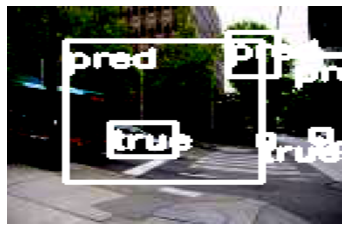

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


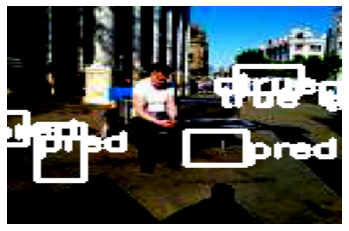

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


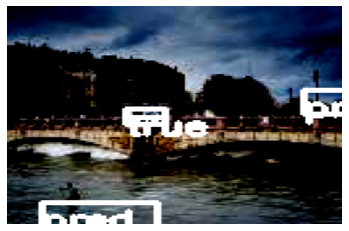

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


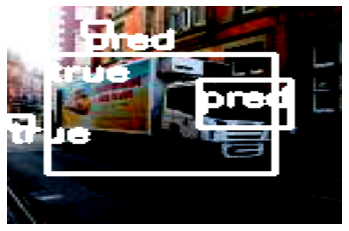

In [162]:
num_displaying_images = 4
for ibx in range(num_displaying_images):

  single_image = torch.squeeze(im_tensor[ibx], 0)
  showing_image = single_image.permute(1,2,0)
  showing_image = np.float32(showing_image)
  showing_image = cv2.UMat(showing_image).get()

  for i in range(len(gt_bbox[ibx])):
    
    x = gt_bbox[ibx][i][0]
    y = gt_bbox[ibx][i][1]
    w = gt_bbox[ibx][i][2]
    h = gt_bbox[ibx][i][3]

    showing_image = cv2 . rectangle (showing_image , ( int (x), int (y)), ( int (x + w), int (y + h)), (36 ,255 ,12), 2)
    showing_image = cv2 . putText (showing_image , 'true', ( int (x),int (y+15)), cv2 .FONT_HERSHEY_SIMPLEX ,0.5, (36 ,255 ,12), 2)
  
    x = pr_bbox[ibx][i][0]
    y = pr_bbox[ibx][i][1]
    w = pr_bbox[ibx][i][2]
    h = pr_bbox[ibx][i][3]

    showing_image = cv2 . rectangle (showing_image , ( int (x), int (y)), ( int (x + w), int (y + h)), (36 ,255 ,12), 2)
    showing_image = cv2 . putText (showing_image , 'pred', ( int (x),int (y+15)), cv2 .FONT_HERSHEY_SIMPLEX ,0.5, (36 ,255 ,12), 2)

  fig , ax = plt . subplots (1,1)
  ax. imshow ( showing_image )
  ax. set_axis_off ()
  plt . axis ('tight')
  plt . show ()

In [163]:
'''This code is borrowed from https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/?fbclid=IwAR0sgWTMx3hbdfaSngA2xFFYA8yErQUEx78jVINNTW4kesgrzyUHSRSph3Y'''
def bb_intersection_over_union(boxA, boxB):
  #convert the bbox coordinates to COCO format
  boxA[2] = boxA[0] + boxA[2]   #x2 = x1 + w
  boxB[2] = boxB[0] + boxB[2]   
  boxA[3] = boxA[1] + boxA[3]   #y2 = y1 + h
  boxB[3] = boxB[1] + boxB[3]
	# determine the (x, y)-coordinates of the intersection rectangle
  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
  boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
  boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
  return iou

In [164]:
IoU = []
all_true_labels = []
all_predicted_labels = []
for j in range(len(pr_bbox)):
  true_key_list = list(true_labels[j].keys() )
  pred_key_list = list(predicted_labels[j].keys() )
  for i in range(len(pr_bbox[j])):
    iou = bb_intersection_over_union(gt_bbox[j][i], pr_bbox[j][i])
    IoU.append(iou)
    if iou > 0:
      all_true_labels.append(true_labels[j][true_key_list[i]].detach().cpu().numpy())
      all_predicted_labels.append(predicted_labels[j][pred_key_list[i]].detach().cpu().numpy())

mean of all IoUs: 0.018506878443019993
mean of non-zero IoUs: 0.09253439221509996
Number of predicted bounding boxes that had zero IoU with their corresponding ground truths: 96
Number of predicted bounding boxes that had non-zero IoU with their corresponding ground truths: 24
Classification accuracy among pairs with non-zero IoU: 0.5
Classification accuracy among all box pairs: 0.1


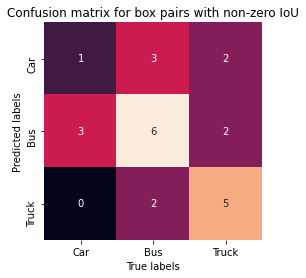

In [165]:
print ('mean of all IoUs:', np.mean(IoU))
print ('mean of non-zero IoUs:', np.mean([x for x in IoU if x != 0]))
length_difference = len(IoU) - len(all_true_labels)
print ('Number of predicted bounding boxes that had zero IoU with their corresponding ground truths:', length_difference)
print ('Number of predicted bounding boxes that had non-zero IoU with their corresponding ground truths:', len(all_true_labels))

import seaborn as sns			
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
os.chdir('/content/drive/My Drive/Deep_Learning/Homeworks/HW6')
score = accuracy_score(all_true_labels, all_predicted_labels)
print ('Classification accuracy among pairs with non-zero IoU:', score)
score = accuracy_score(all_true_labels, all_predicted_labels) * len(all_true_labels) / len(IoU) 
print ('Classification accuracy among all box pairs:', score)

mat = confusion_matrix(all_true_labels, all_predicted_labels)
import pandas as pd
plt.figure(0)
mat_df = pd.DataFrame(mat, ['Car', 'Bus', 'Truck'], ['Car', 'Bus', 'Truck'])
sns.heatmap(mat_df.T, square=True, annot=True, fmt = 'd', cbar = False)
plt.ylabel('Predicted labels')
plt.xlabel('True labels')
plt.title('Confusion matrix for box pairs with non-zero IoU')
plt.savefig('validation_confusion_matrix.jpg', bbox_inches = 'tight', pad_inches = 0)